In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

Data Manager

In [2]:
data = pd.read_excel(r'C:\Users\Mehdi\Desktop\1.xlsx')

Scaling the data

In [9]:
scaler=RobustScaler()
std_data = scaler.fit(data.loc[:,'Pb':])
std_data = scaler.transform(data.loc[:,'Pb':])
std_data = pd.DataFrame(std_data, columns = data.columns[6:27])
std_data = pd.concat([data.loc[:,'form':'h'], std_data], axis=1)

Pearson

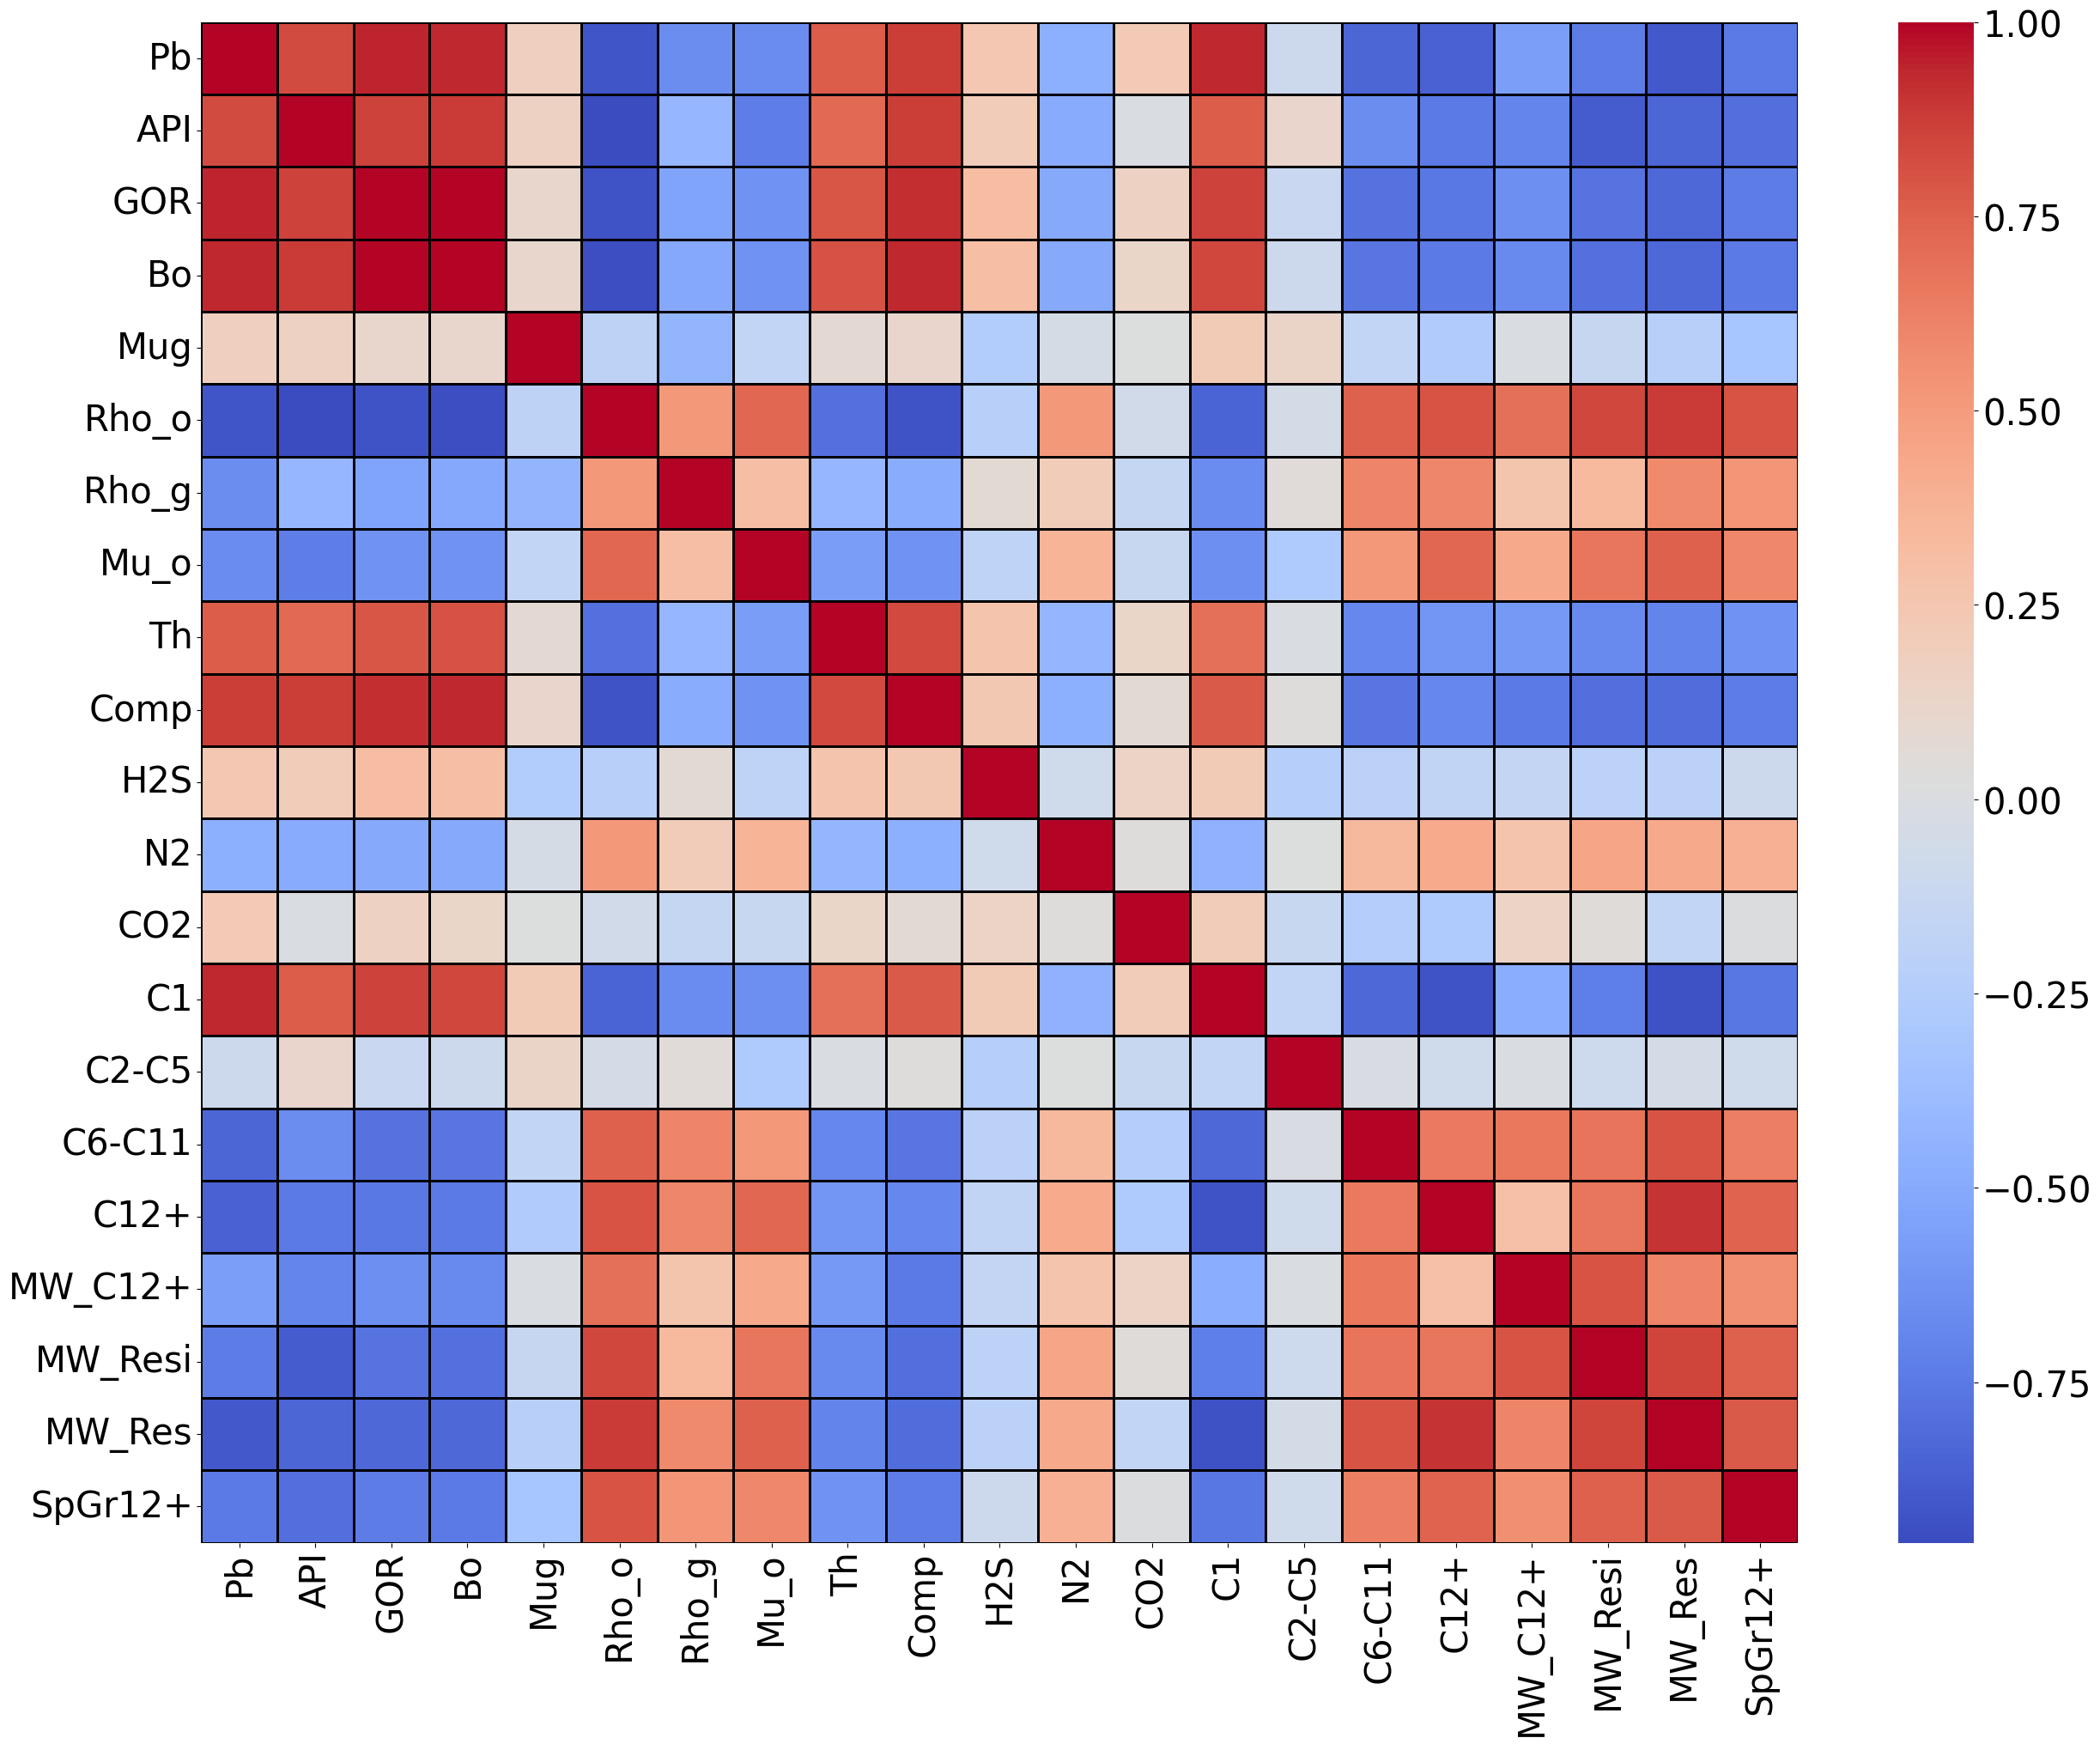

In [4]:
pearson = std_data.corr()

fig=plt.figure(figsize=(30,23))
plt.rc('xtick', labelsize = 30)
plt.rc('ytick', labelsize = 30)
sns.heatmap(std_data.corr(), cmap='coolwarm', annot=False, linewidths=2, linecolor='black')
plt.show()

Dropping some data based on what we learned from pearson

In [5]:
std_data.drop(labels=['GOR','Bo', 'API', 'Comp','C12+' ,'MW_Res'],axis= 1,inplace=True)
#std_data_comp.drop(labels=['GOR','Bo', 'API', 'Comp','C12+' ,'MW_Res'],axis= 1,inplace=True)

Separation of Data based on Formation

In [28]:
FAH_S = std_data[(std_data.form == "FAH")]
ILM_S = std_data[(std_data.form == "ILM")]
SAR_S = std_data[(std_data.form == "SAR")]
GAD_S = std_data[(std_data.form == "GAD")]
KZH_S = std_data[(std_data.form == "KZH")]
ASM_S = std_data[(std_data.form == "ASM")]

FAH = data[(data.form == "FAH")]
ILM = data[(data.form == "ILM")]
SAR = data[(data.form == "SAR")]
GAD = data[(data.form == "GAD")]
KZH = data[(data.form == "KZH")]
ASM = data[(data.form == "ASM")]

Pb_FAH_Depth_Corr = FAH.loc[0:142,'Pb']+FAH.loc[0:142,'h'].apply(lambda x: (4300 - x)*-0.13)
Pb_FAH_Depth_Corr = pd.DataFrame(Pb_FAH_Depth_Corr)
Pb_FAH_Depth_Corr[1] = FAH.loc[0:142,'h']

#sns.pairplot(FAH)
#plt.show()

Plots based on location and depth

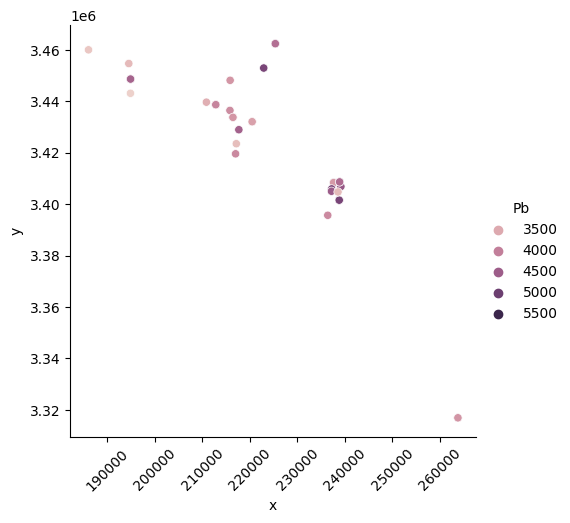

In [43]:
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
sns.relplot(data=FAH, x="x", y="y", hue="Pb")
plt.xticks(rotation = 45)
plt.show()

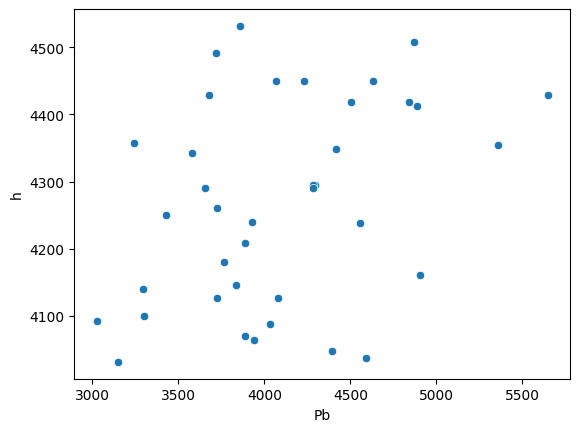

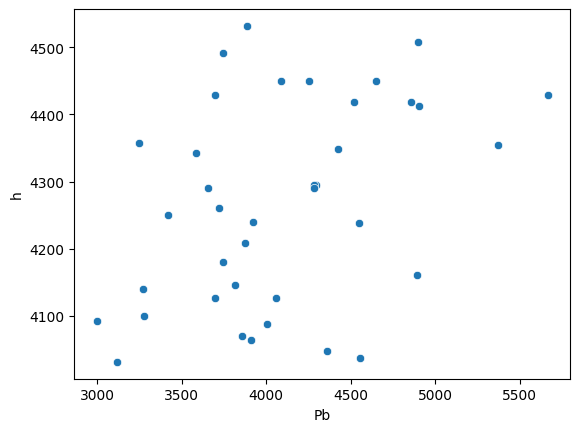

In [48]:
sns.scatterplot(data=FAH, x='Pb', y="h", sizes=(10, 100))
plt.show()

sns.scatterplot(Pb_FAH_Depth_Corr, x=Pb_FAH_Depth_Corr[0], y=Pb_FAH_Depth_Corr[1])
plt.xlabel('Pb')
plt.ylabel('h')
plt.show()

Isolation Forest


0     -0.084431
1     -0.010256
2      0.010214
7      0.060476
8      0.090264
9     -0.005079
10     0.049391
11     0.080400
12     0.039786
13     0.063491
14     0.020886
16     0.095704
24     0.075640
25    -0.013177
26     0.026297
52     0.034953
55     0.094544
56    -0.149684
57     0.051955
58    -0.018629
59     0.032657
62     0.081725
63    -0.020646
64     0.031222
67     0.015353
68     0.014727
70     0.022238
72     0.011824
76    -0.005675
108    0.071399
109    0.084114
110    0.000784
121    0.000357
132   -0.066505
133   -0.045778
134    0.020013
136    0.026122
137    0.002880
Name: Scores, dtype: float64


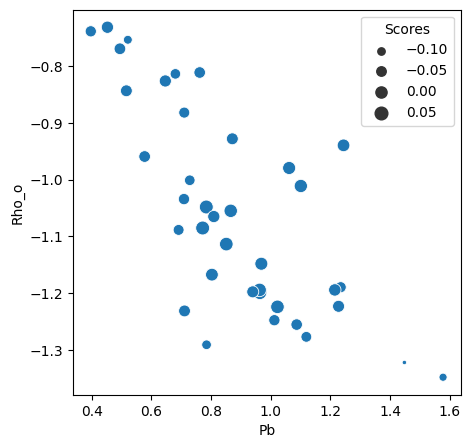

In [51]:
def IsolationForest(Data, n_est):
    from sklearn.ensemble import IsolationForest
    #Contamination is the percentage of outlier
    clf = IsolationForest(n_estimators = n_est)
    clf.fit(Data)
    Data['Scores'] = clf.decision_function(Data)
    print(Data['Scores'])
    fig=plt.figure(figsize=(5,5))
    plt.rc('xtick', labelsize = 10)
    plt.rc('ytick', labelsize = 10)
    #plt.scatter(Data['Pb'], Data['Rho_o'], c='red', alpha=0.9)
    sns.scatterplot(data=Data, x='Pb', y="Rho_o", size = 'Scores',sizes=(10, 100))
    plt.show()
    #sns.pairplot(FAH, hue = 'Scores', corner=True)
    #plt.show()
    return

#COMP1 = std_data.loc[0:142,'Pb':]
FAH1 = FAH_S.loc[0:142,'Pb':]
#ILM1 = ILM_S.loc[0:142,'Pb':]
#SAR1 = SAR_S.loc[0:142,'Pb':]
#GAD1 = GAD_S.loc[0:142,'Pb':]
#KZH1 = KZH_S.loc[0:142,'Pb':]

#IsolationForest(COMP1, 10)
IsolationForest(FAH1, 10)
#IsolationForest(ILM1, 10)
#IsolationForest(SAR1, 10)
#IsolationForest(GAD1, 10)
#IsolationForest(KZH1, 10)

DBSCAN

Finding optimum epsilon

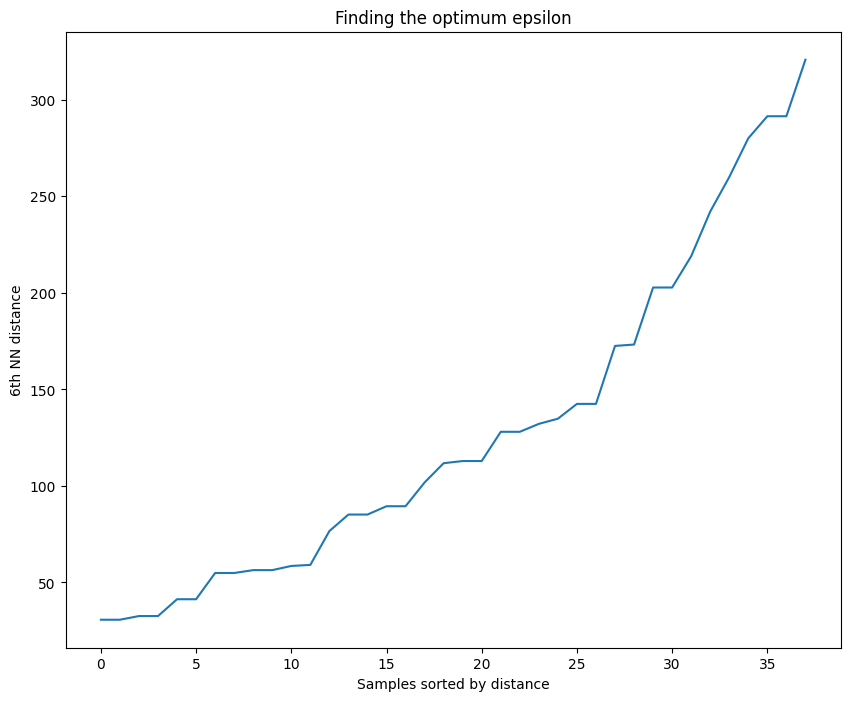

In [53]:
def OptimumEpsilonFinder (Data, n_nei):
    from sklearn.neighbors import NearestNeighbors
    Neighbors=NearestNeighbors(n_neighbors=n_nei)
    nbrs=Neighbors.fit(Data)
    distances, indices = nbrs.kneighbors(Data)
    fig=plt.figure(figsize=(10,8))
    distances=np.sort(distances, axis=0)
    distances=distances[:,1]
    plt.plot(distances)
    plt.title('Finding the optimum epsilon')
    plt.xlabel('Samples sorted by distance')
    plt.ylabel('6th NN distance')
    plt.show()
    return
OptimumEpsilonFinder (FAH.loc[0:142,'Pb':], 2)

DBSCAN Itself

0     -1
1     -1
2      0
7      0
8     -1
9     -1
10    -1
11    -1
12    -1
13     0
14     0
16    -1
24     0
25     0
26     0
52     0
55     0
56    -1
57     0
58    -1
59     0
62     0
63     0
64     0
67     0
68     0
70     0
72     0
76     0
108    0
109   -1
110   -1
121   -1
132   -1
133    0
134    0
136    0
137   -1
Name: clusters, dtype: int64


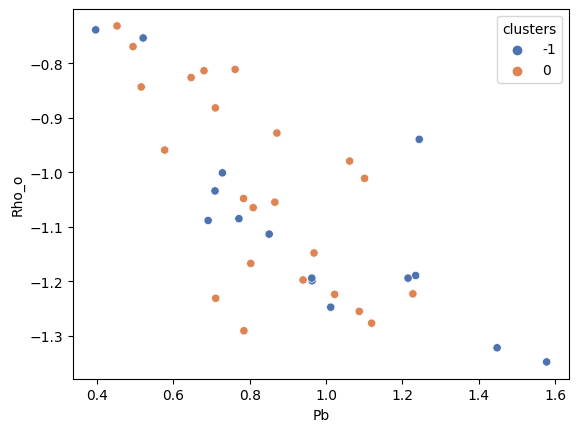

In [54]:
#COMP2 = std_data.loc[0:142,'Pb':]
FAH2 = FAH_S.loc[0:142,'Pb':]
#ILM2 = ILM_S.loc[0:142,'Pb':]
#SAR2 = SAR_S.loc[0:142,'Pb':]
#GAD2 = GAD_S.loc[0:142,'Pb':]
#KZH2 = KZH_S.loc[0:142,'Pb':]

def DBSCANN(Data, eps, min_sam):
    from sklearn.cluster import DBSCAN
    Clustering=DBSCAN(eps=eps ,min_samples=min_sam, metric='euclidean')
    DB=Clustering.fit_predict(Data)
    labels=pd.DataFrame(DB,columns=['clusters'])
    #FAH=pd.DataFrame(FAH,columns=data.columns[:])
    Data['clusters']=DB
    print(Data['clusters'])
    #data['clusters']=DB
    Group_by_mean=Data.groupby(by='clusters').mean()
    #print(Group_by_mean)
    sns.scatterplot(data=Data, x='Pb', y="Rho_o", hue = 'clusters', palette="deep")
    plt.show()
    #sns.pairplot(FAH, hue = 'clusters')
    #plt.show()
    return

#DBSCANN(COMP2, 2, 6)
DBSCANN(FAH2, 2, 6)
#DBSCANN(ILM2, 2, 6)
#DBSCANN(SAR2, 2, 6)
#DBSCANN(GAD2, 2, 6)
#DBSCANN(KZH2, 2, 6)

LOF

0     -1.697793
1     -1.588588
2     -1.045078
7     -0.992777
8     -1.556246
9     -1.605587
10    -1.542411
11    -1.673731
12    -1.608864
13    -0.989171
14    -1.009223
16    -1.240692
24    -0.990887
25    -0.986450
26    -0.995072
52    -1.023811
55    -0.990612
56    -1.496861
57    -0.991894
58    -0.979420
59    -0.980318
62    -0.990693
63    -0.992452
64    -0.993650
67    -0.994331
68    -1.079271
70    -0.986226
72    -1.013171
76    -0.999912
108   -0.995416
109   -1.005091
110   -1.026631
121   -1.046190
132   -1.017746
133   -1.009948
134   -0.992157
136   -0.995288
137   -1.043330
Name: Scores, dtype: float64


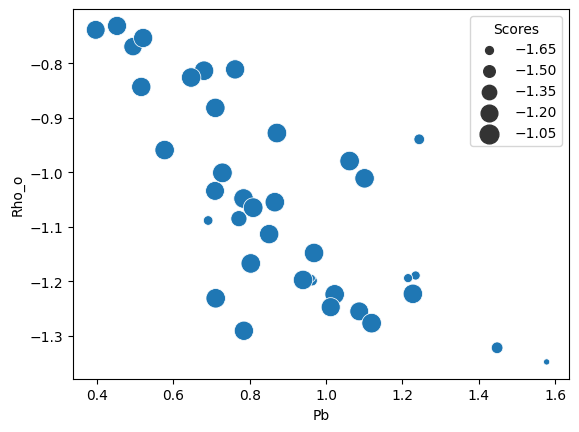

In [57]:
FAH3 = FAH_S.loc[0:142,'Pb':]
def LOF(Data, n_nei, con):
    from sklearn.neighbors import LocalOutlierFactor
    clf=LocalOutlierFactor(n_neighbors=n_nei, contamination=con,
                           metric='euclidean')
    hh= clf.fit(Data)
    Data['Scores']=clf.negative_outlier_factor_
    print(Data['Scores'])
    sns.scatterplot(data=Data, x='Pb', y="Rho_o", size = 'Scores',sizes=(20, 200))
    plt.show()
    return
LOF(FAH3, 20, 'auto')

OCSVM

0      4.065518
1      4.346679
2      8.132921
7      9.432046
8      6.543993
9      6.301780
10     6.499912
11     6.044377
12     6.363321
13     9.336399
14     8.297287
16     6.763641
24     9.390824
25     8.881325
26     9.910211
52     8.438337
55     9.594207
56     5.214988
57     9.571661
58     8.841129
59     9.068692
62     9.449346
63     8.449441
64     8.753067
67     8.627125
68     7.450602
70     8.671431
72     8.430602
76     8.738104
108    9.263707
109    8.972144
110    8.295528
121    8.219183
132    7.998399
133    8.359455
134    8.829714
136    9.542809
137    8.324237
Name: Scores, dtype: float64


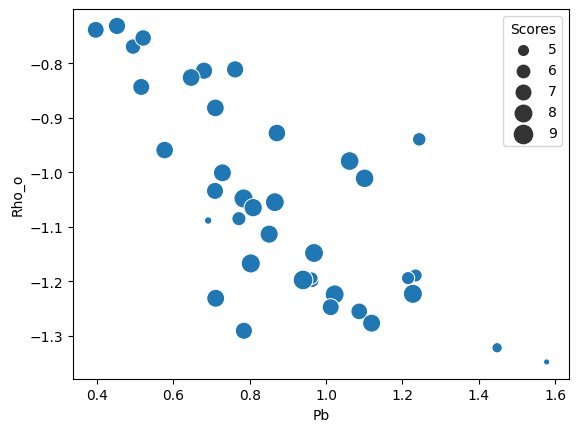

In [58]:
FAH4 = FAH_S.loc[0:142,'Pb':]
def OCSVM(Data, gamma):
    from sklearn.svm import OneClassSVM
    clf = OneClassSVM(gamma=gamma).fit(Data)
    clf.predict(Data)
    Data['Scores']=clf.score_samples(Data)
    print(Data['Scores'])
    sns.scatterplot(data=Data, x='Pb', y="Rho_o", size='Scores', sizes=(20, 200))
    plt.show()
    return
OCSVM(FAH4, 'auto')

ABOD